**Defining the Question**


**Specifying the data analysis question:**



* Identify the most popular hour of the day for picking up a shared electric car(Bluecar) in the city of Paris over the month of April 2018.


* What is the most popular hour for returning cars?

* What station is the most popular overall

* What station is the most popular At the most popular picking hour

* What postal code is the most popular for picking up Blue cars?
* Does the most popular station belong to that postal code? Overall

* Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars?

**Data Analysis**

In [1]:
#importing our libraries
import pandas as pd
import numpy as np

In [2]:
#Loading our datasets
url="Autolib_dataset (2).csv"
autolib_df=pd.read_csv(url)

In [3]:
#previewing our loaded dataset
autolib_df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,...,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,...,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,...,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,...,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,...,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [4]:
#Describing and getting information about our datasets
autolib_df.shape
autolib_df.info()
autolib_df.columns
autolib_df.describe()
autolib_df.sample()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,...,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
2394,9 Avenue Paul Signac,2,2,0,0,0,nonexistent,Montreuil,NaN,montreuil-paulsignac-9,...,NaN,2,station,ok,nonexistent,2018,4,6,17,30


In [5]:
#Cleaning our data
#Validity
#Dropping irrelevant columns
autolib_df.drop(['Scheduled at','Displayed comment','Charging Status'], axis=1, inplace=True)


In [6]:
#converting all columns to lowercase
autolib_df.columns = [x.lower() for x in autolib_df.columns]
autolib_df

,address,cars,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,city,id,kind,geo point,...,rental status,slots,station type,status,subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,Paris,paris-suffren-2,STATION,"48.857, 2.2917",...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",...,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",...,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",...,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",...,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",...,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",...,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",...,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [7]:
#removing white spaces in our columns
autolib_df.columns = autolib_df.columns.str.replace(' ', '')
autolib_df

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,chargeslots,city,id,kind,geopoint,...,rentalstatus,slots,stationtype,status,subscriptionstatus,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,Paris,paris-suffren-2,STATION,"48.857, 2.2917",...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",...,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",...,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",...,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",...,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",...,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",...,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",...,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [8]:
#checking for missing values and dropping them
autolib_df.isnull().values.any()
autolib_df.dropna()

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,chargeslots,city,id,kind,geopoint,...,rentalstatus,slots,stationtype,status,subscriptionstatus,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,Paris,paris-suffren-2,STATION,"48.857, 2.2917",...,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",...,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",...,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",...,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",...,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",...,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",...,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",...,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",...,operational,3,station,ok,nonexistent,2018,4,4,17,27


In [9]:
#checking for duplicates and dropping them
autolib_df.duplicated().values.any()


False

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,chargeslots,chargingstatus,city,id,slots,stationtype,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,NaN,Paris,paris-suffren-2,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,NaN,Paris,paris-raymondlosserand-145,0,station,2018,4,6,7,24
4,6 avenue de la Porte de Champerret,3,3,0,0,0,NaN,Paris,paris-portedechamperret-6,3,station,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,NaN,Paris,paris-voltaire-8,4,station,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,NaN,Paris,paris-citroencevennes-parking,0,station,2018,4,8,18,20


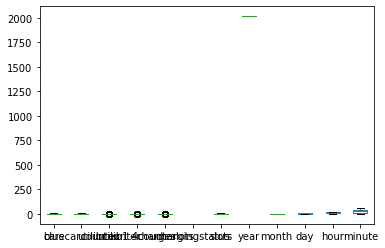

In [25]:
#checking for outliers and deleting them
import matplotlib.pyplot as plt 
%matplotlib inline 
autolib_df.boxplot(column =['cars','bluecarcounter','utilibcounter','utilib1.4counter','chargeslots','chargingstatus','slots','year','month','day','hour','minute'], grid = False)
 
#Using IQR scores to remove the outliers.
Q1 = autolib_df.quantile(0.25)
Q3 = autolib_df.quantile(0.75)
IQR = Q3 - Q1
#Removing outliers based on the IQR range and stores the result in the data frame 'new_autolib_df'
new_autolib_df= autolib_df[~((autolib_df < (Q1 - 1.5 * IQR)) | (autolib_df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_autolib_df.head()

In [116]:
#Exporting our cleaned dataframe

new_autolib_df.to_csv('new_autolib.csv', index=False)
new_autolib_data_df = pd.read_csv('new_autolib.csv')
new_autolib_data_df.head()

,address,cars,bluecarcounter,utilibcounter,utilib1.4counter,chargeslots,chargingstatus,city,id,slots,stationtype,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,NaN,Paris,paris-suffren-2,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,NaN,Paris,paris-raymondlosserand-145,0,station,2018,4,6,7,24
2,6 avenue de la Porte de Champerret,3,3,0,0,0,NaN,Paris,paris-portedechamperret-6,3,station,2018,4,8,17,23
3,8 Boulevard Voltaire,0,0,0,0,0,NaN,Paris,paris-voltaire-8,4,station,2018,4,6,7,2
4,37 rue Leblanc,0,0,0,0,0,NaN,Paris,paris-citroencevennes-parking,0,station,2018,4,8,18,20


In [105]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
#joining successive(intime)measures/counters for a given station
new_autolib_data_df['bluecar'] = new_autolib_data_df['bluecarcounter'].diff()
popular_hour=new_autolib_data_df[(new_autolib_data_df.city == 'Paris') & (new_autolib_data_df.bluecar <0)].groupby('hour')['hour'].count().sort_values(ascending = False)
popular_hour

hour
16    48
21    44
0     36
3     36
13    35
17    34
23    34
19    34
7     32
5     32
11    30
2     30
20    29
4     27
9     27
18    26
12    26
6     24
14    24
15    23
10    23
22    23
8     21
1     16
Name: hour, dtype: int64

In [107]:
#What is the most popular hour for returning cars?
popular_hour_returning=new_autolib_data_df[(new_autolib_data_df.city == 'Paris') & (new_autolib_data_df.bluecar >0)].groupby('hour')['hour'].count().sort_values(ascending = False)
popular_hour_returning

hour
8     32
18    28
15    28
10    27
12    27
21    26
19    26
0     25
1     25
3     25
6     24
9     24
23    24
22    24
11    23
13    20
5     20
7     19
4     19
2     19
16    18
17    17
20    17
14    13
Name: hour, dtype: int64

In [127]:
#What station is the most popular overall
popular_station=new_autolib_data_df.groupby('id')['hour'].count().sort_values(ascending = False)
popular_station

id
paris-grenelle31-parking              11
fontenayauxroses-robertmarchand-32    10
drancy-diderot-125                     9
paris-villiot-20                       9
bagnolet-republique-58                 9
                                      ..
paris-raymondpoincare-51               1
paris-raspail-9                        1
paris-quatreseptembre-26               1
paris-alesia-33                        1
paris-richardlenoir-110                1
Name: hour, Length: 1005, dtype: int64

In [ ]:
#What station is the most popular At the most popular picking hour
popular_station_most_pickinghour=new_autolib_data_df[(new_autolib_data_df.city == 'Paris') & (new_autolib_data_df.bluecarcounter <0)].groupby('address')['hour'].count().sort_values(ascending = False)
